In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Load input data
X = np.loadtxt('5_data_clustering.txt', delimiter=',')
num_clusters = 5

In [3]:
X

array([[ 2.08,  1.05],
       [ 2.05,  7.7 ],
       [ 4.53,  5.49],
       [ 6.23,  1.02],
       [ 5.35,  7.86],
       [ 2.88,  0.79],
       [ 2.32,  8.5 ],
       [ 5.06,  5.65],
       [ 5.38,  3.53],
       [ 6.31,  9.73],
       [ 3.41,  2.05],
       [ 1.75,  7.38],
       [ 3.88,  5.73],
       [ 7.22,  2.88],
       [ 5.85,  9.11],
       [ 3.66,  2.38],
       [ 0.45,  7.99],
       [ 6.01,  5.83],
       [ 7.06,  2.41],
       [ 7.47,  8.97],
       [ 2.2 ,  2.71],
       [ 2.94,  8.71],
       [ 5.87,  4.56],
       [ 4.57,  1.33],
       [ 5.84,  6.54],
       [ 3.4 ,  1.  ],
       [ 1.44,  8.26],
       [ 4.29,  4.69],
       [ 8.09,  1.99],
       [ 6.48,  9.44],
       [ 2.94,  1.78],
       [ 0.41,  9.14],
       [ 5.42,  4.08],
       [ 7.47,  2.15],
       [ 5.62,  7.65],
       [ 3.71,  1.26],
       [ 0.41,  8.9 ],
       [ 4.93,  5.73],
       [ 7.23,  0.14],
       [ 6.77,  9.09],
       [ 3.23,  2.64],
       [ 1.61,  7.85],
       [ 4.7 ,  4.78],
       [ 6.

([], [])

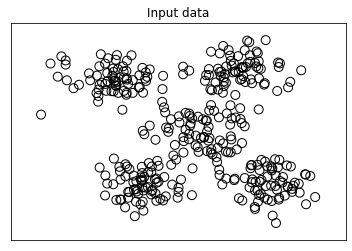

In [15]:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [5]:
# Create KMeans object 
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [6]:
# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=5)

In [7]:
# Step size of the mesh
step_size = 0.01

# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))


In [8]:
# Predict output labels for all the points on the grid 
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

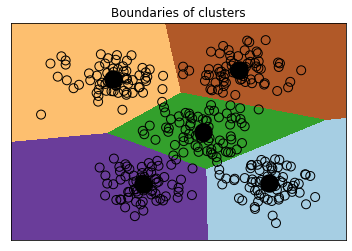

In [9]:
# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), 
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')
# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=210, linewidths=4, color='black', 
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()